# Example Two Variable Gradient Descent

Given the cost function with two variables:

$$J(\theta_0, \theta_1) = \theta_0^2 + 2\theta_1^2$$

Minimize this cost function using gradient descent. 

The gradient of this cost function is as follows:

$
\nabla J(\theta_0, \theta_1) = \begin{bmatrix}
2\theta_0 \\
4\theta_1
\end{bmatrix}
$

Now, let's run a few iterations of gradient descent with an initial guess for the parameters $\theta_0$ and $\theta_1$, and a learning rate ($\alpha$) of 0.1:

**Initialization**:
- $\theta_0 = 1.0$
- $\theta_1 = 2.0$
- $\alpha = 0.1$

**Iteration 1**:
1. Calculate the gradient at the current parameters:

   $\nabla J(\theta_0, \theta_1) = \begin{bmatrix}
   2 \cdot 1.0 \\
   4 \cdot 2.0
   \end{bmatrix} = \begin{bmatrix}
   2 \\
   8
   \end{bmatrix}$

2. Update the parameters:

   $\theta_0 = \theta_0 - \alpha \cdot 2 = 1.0 - 0.1 \cdot 2 = 0.8$

   $\theta_1 = \theta_1 - \alpha \cdot 8 = 2.0 - 0.1 \cdot 8 = 1.2$

**Iteration 2**:
1. Calculate the gradient at the updated parameters:

   $\nabla J(\theta_0, \theta_1) = \begin{bmatrix}
   2 \cdot 0.8 \\
   4 \cdot 1.2
   \end{bmatrix} = \begin{bmatrix}
   1.6 \\
   4.8
   \end{bmatrix}$

2. Update the parameters:

   $\theta_0 = 0.8 - 0.1 \cdot 1.6 = 0.64$

   $\theta_1 = 1.2 - 0.1 \cdot 4.8 = 0.72$

You would continue these iterations until the algorithm converges to a minimum.

**Stopping Criteria**:

Choose the stopping criteria tol and max iteratinos such that the algorithms stops when the parameter converges to within a tolerance $$\Sigma_{j=0}^2|\theta_{ji+1}-\theta_{ji}|<tol$$
   or the number of iterations reaches the max iterations. 
There are many possible formula for the stopping criteria the one of the most strigent is the max norm:
$$\max_{j}|\theta_{ji+1}-\theta_{ji}|<tol.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Define the quadratic function J(\theta) = \theta^2+2\theta+100
def quadratic_cost_function(theta):
    return theta[0]**2+2*theta[1]**2
# Define the derivative of the quadratic function f'(x) = 2x
def gradient(theta):
    return np.array([2*theta[0],4*theta[1]])
# Gradient Descent parameters
learning_rate = 0.1  # Step size or learning rate
# Initial guess
theta_0 = np.array([1,2])
def gradient_descent(theta,learning_rate=0.1, tol=1e-6, max_iter=100):
    theta_history = [theta]
    cost_history = [quadratic_cost_function(theta)]
    for i in range(max_iter):
        # Update x using the gradient and learning rate
        theta_new = theta - learning_rate * gradient(theta)

        # Append the updated values to the history lists
        theta_history.append(theta_new)
        cost_history.append(quadratic_cost_function(theta_new))
        if np.sum(np.abs((theta-theta_new))) < tol:
            return theta,theta_history, cost_history,i
        theta=theta_new

    return theta,theta_history, cost_history,i

tol=0.001
max_iterations = 100     # Number of iterations
theta, theta_history, cost_history,I=gradient_descent(theta_0,learning_rate=learning_rate,tol=tol,max_iter=max_iterations)
# Print the final result
print(f'Optimal theta: {theta}')
print(f"Minimum Cost value: {quadratic_cost_function(theta)}")
print(f"Number of Interations I: {I}")

Optimal theta: [4.72236648e-03 9.47676268e-06]
Minimum Cost value: 2.2300924816592288e-05
Number of Interations I: 24


In [2]:
theta_hist_array=np.array(theta_history)
theta_hist_array

array([[1.00000000e+00, 2.00000000e+00],
       [8.00000000e-01, 1.20000000e+00],
       [6.40000000e-01, 7.20000000e-01],
       [5.12000000e-01, 4.32000000e-01],
       [4.09600000e-01, 2.59200000e-01],
       [3.27680000e-01, 1.55520000e-01],
       [2.62144000e-01, 9.33120000e-02],
       [2.09715200e-01, 5.59872000e-02],
       [1.67772160e-01, 3.35923200e-02],
       [1.34217728e-01, 2.01553920e-02],
       [1.07374182e-01, 1.20932352e-02],
       [8.58993459e-02, 7.25594112e-03],
       [6.87194767e-02, 4.35356467e-03],
       [5.49755814e-02, 2.61213880e-03],
       [4.39804651e-02, 1.56728328e-03],
       [3.51843721e-02, 9.40369969e-04],
       [2.81474977e-02, 5.64221981e-04],
       [2.25179981e-02, 3.38533189e-04],
       [1.80143985e-02, 2.03119913e-04],
       [1.44115188e-02, 1.21871948e-04],
       [1.15292150e-02, 7.31231688e-05],
       [9.22337204e-03, 4.38739013e-05],
       [7.37869763e-03, 2.63243408e-05],
       [5.90295810e-03, 1.57946045e-05],
       [4.722366

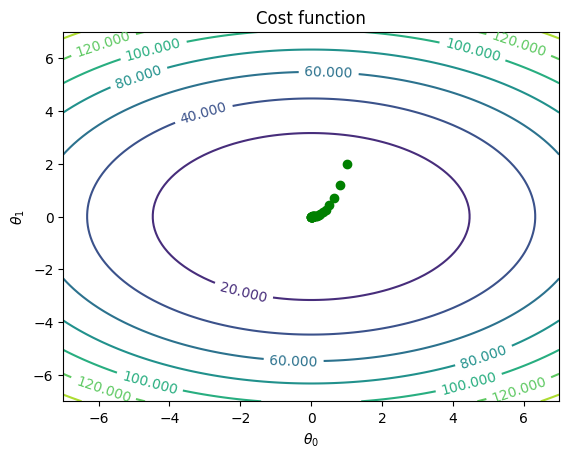

In [3]:
theta_values0 = np.linspace(-7, 7, 100)
theta_values1 = np.linspace(-7, 7, 100)

theta_values = np.meshgrid(theta_values0 , theta_values1)
theta_hist_array=np.array(theta_history)
cost_values = quadratic_cost_function(theta_values)
fig, ax = plt.subplots()
CS = ax.contour(theta_values[0],theta_values[1], cost_values)
ax.clabel(CS, inline=True, fontsize=10)
ax.plot(theta_hist_array[:,0],theta_hist_array[:,1],'go')

ax.set_title('Cost function')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
plt.show()

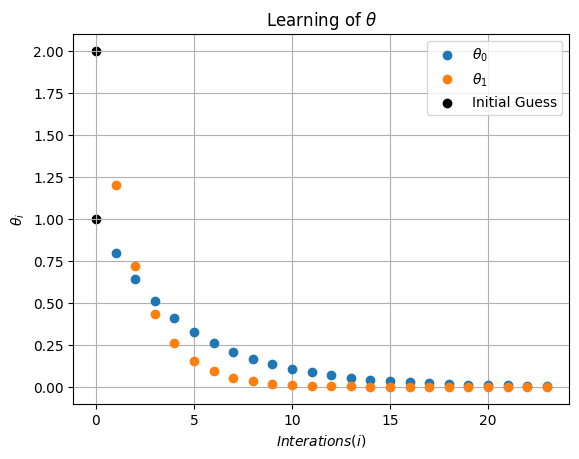

In [4]:
plt.scatter(0,theta_hist_array[0,0],  c='k', label='Initial Guess')
plt.scatter(0,theta_hist_array[0,1],  c='k')

plt.plot(np.arange(1,I),theta_hist_array[1:I,0],'o',label=r'$\theta_0$')
plt.plot(np.arange(1,I),theta_hist_array[1:I,1],'o',label=r'$\theta_1$')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$\theta_i$')
plt.legend()
plt.grid(True)
plt.title(r'Learning of $\theta$')
plt.show()

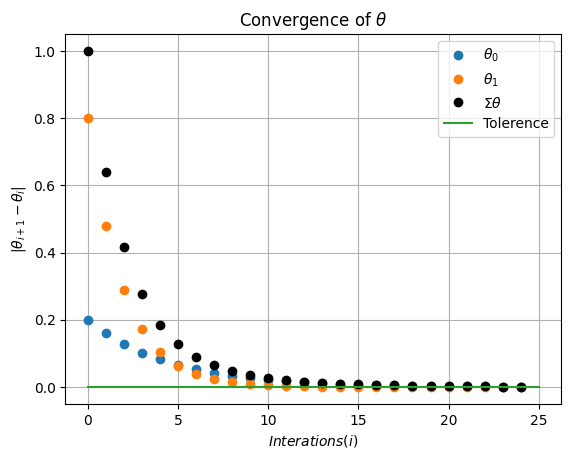

In [5]:
plt.plot(np.abs(np.diff(theta_hist_array[:,0])),'o',label=r'$\theta_0$')
plt.plot(np.abs(np.diff(theta_hist_array[:,1])),'o',label=r'$\theta_1$')
plt.plot(np.abs(np.diff(theta_hist_array[:,1]))+np.abs(np.diff(theta_hist_array[:,0])),'ko',label=r'$\Sigma \theta$')
plt.plot([0,I+1],[tol,tol],label='Tolerence')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$|\theta_{i+1}-\theta_{i}|$')
plt.legend()
plt.grid(True)
plt.title(r'Convergence of $\theta$')
plt.show()


## Playing with Hyperparameters

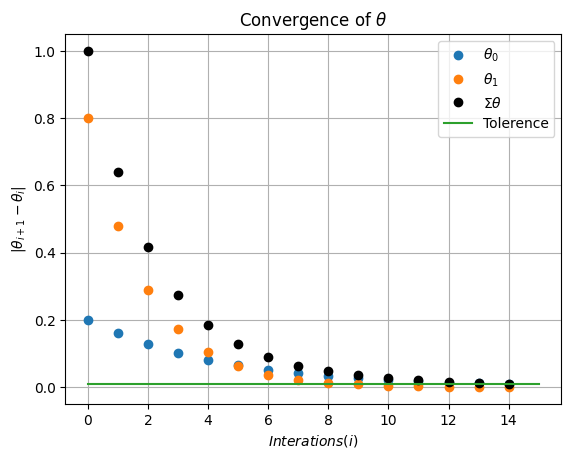

In [6]:
tol=0.01
learning_rate=0.1
max_iterations = 100     # Number of iterations

theta, theta_history, cost_history,I=gradient_descent(theta_0,learning_rate=learning_rate,tol=tol,max_iter=max_iterations)
theta_hist_array=np.array(theta_history)

plt.plot(np.abs(np.diff(theta_hist_array[:,0])),'o',label=r'$\theta_0$')
plt.plot(np.abs(np.diff(theta_hist_array[:,1])),'o',label=r'$\theta_1$')
plt.plot(np.abs(np.diff(theta_hist_array[:,1]))+np.abs(np.diff(theta_hist_array[:,0])),'ko',label=r'$\Sigma \theta$')
plt.plot([0,I+1],[tol,tol],label='Tolerence')
plt.xlabel(r'$Interations (i)$')
plt.ylabel(r'$|\theta_{i+1}-\theta_{i}|$')
plt.legend()
plt.grid(True)
plt.title(r'Convergence of $\theta$')
plt.show()


In [7]:
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
def interactive_GD(tol=0.01, learning_rate=0.1, max_iterations = 100     ):
    theta, theta_history, cost_history,I=gradient_descent(theta_0,learning_rate=learning_rate,tol=tol,max_iter=max_iterations)
    theta_hist_array=np.array(theta_history)

    plt.plot(np.abs(np.diff(theta_hist_array[:,0])),'o',label=r'$\theta_0$')
    plt.plot(np.abs(np.diff(theta_hist_array[:,1])),'o',label=r'$\theta_1$')
    plt.plot(np.abs(np.diff(theta_hist_array[:,1]))+np.abs(np.diff(theta_hist_array[:,0])),'ko',label=r'$\Sigma \theta$')
    plt.plot([0,I+1],[tol,tol],label='Tolerence')
    plt.xlabel(r'$Interations (i)$')
    plt.ylabel(r'$|\theta_{i+1}-\theta_{i}|$')
    plt.legend()
    plt.grid(True)
    plt.title(r'Convergence of $\theta$')
    plt.show()


In [8]:
_ = widgets.interact(interactive_GD, tol = (0.00001, 0.1, .0005), learning_rate=(0.00001, 1, .0005),
                     max_iterations= (10,1000,10))

interactive(children=(FloatSlider(value=0.01, description='tol', max=0.1, min=1e-05, step=0.0005), FloatSlider…